# Explore Weather Trends - 1st Project
*Author: Josip Matic  
Date: 27.03.2019*

## Introduction
In this project I was given the task to analyse global weather data and compare them with the closest city to my hometown Zurich, which is Bern (Switzerland).  
Furthermore, I am going to highlight in this project noteworthy findings during my investigation.

## Extraction of the data
Udacity offered a GUI (Graphical User Interface) including a SQL Workspace to query the desired tables:
* city_data
* city_list
* global_data

Therefore, I used these queries below to have them displayed with my desired conditions:
*city_list* won't be used for my project as it is a subset of *city_data*.

\#sql  
SELECT * FROM CITY_DATA WHERE CITY = 'Bern';  
SELECT * FROM GLOBAL_DATA;

With the Download button in the GUI the tables were downloaded and saved with their particular names on my computer in the path:  *C:\Users\Josip\Documents\_Udacity\ND_DA\1_Assessment\Data\*

## Working with the CSV
From here on out, pyhton will be used with the popular juypter notebook.  <br />
To display the tables in python the library *pandas* has to be imported first.  
Afterwards, the table will be loaded into a variable as a data frame.

In [1]:
import pandas as pd

In [2]:
path = r"C:\Users\Josip\Documents\_Udacity\ND_DA\1_Assessment\Data"

bern_data = pd.read_csv(path + r"\bern_data.csv")
global_data = pd.read_csv(path + r"\global_data.csv")

### Data Analysis

In [3]:
# shows the first 5 records of a table
bern_data.head()

,year,city,country,avg_temp
0,1743,Bern,Switzerland,3.54
1,1744,Bern,Switzerland,8.19
2,1745,Bern,Switzerland,0.36
3,1746,Bern,Switzerland,NaN
4,1747,Bern,Switzerland,NaN


In [4]:
# Date difference in years
bern_data.year.max()-bern_data.year.min()

270

In [5]:
# count of each column, avg_temp has less counts as it has NaN values. These are not counted.
bern_data.count()

year        271
city        271
country     271
avg_temp    267
dtype: int64

In [6]:
# These are the missing four years
bern_data[bern_data.avg_temp.isna()]

,year,city,country,avg_temp
3,1746,Bern,Switzerland,NaN
4,1747,Bern,Switzerland,NaN
5,1748,Bern,Switzerland,NaN
6,1749,Bern,Switzerland,NaN


In [7]:
# A description of the values in the column 'avg_temp'
bern_data['avg_temp'].describe()

count    267.000000
mean       6.808577
std        0.861983
min        0.360000
25%        6.390000
50%        6.830000
75%        7.315000
max        8.780000
Name: avg_temp, dtype: float64

The table has 4 columns ('year','city','country','avg_temp').  
There is for each year one record and in total there are only 4 records with no temperature measurement.
The mean and the median of the *avg_temp* are close to each other, which means the data is normally distributed.

In [8]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [9]:
# Displays first 5 records by descending order of the temperature
global_data.sort_values(['avg_temp'],ascending=False)[:10]

,year,avg_temp
265,2015,9.83
257,2007,9.73
260,2010,9.70
255,2005,9.70
263,2013,9.61
264,2014,9.57
252,2002,9.57
253,2003,9.53
256,2006,9.53
261,2011,9.52


It is interesting to observe that the 10 hottest years on the globe happened all after the year 2000.

In [10]:
bern_data.sort_values(['avg_temp'],ascending=False)[:10]

,year,city,country,avg_temp
251,1994,Bern,Switzerland,8.78
268,2011,Bern,Switzerland,8.68
257,2000,Bern,Switzerland,8.54
260,2003,Bern,Switzerland,8.48
264,2007,Bern,Switzerland,8.43
259,2002,Bern,Switzerland,8.42
247,1990,Bern,Switzerland,8.19
263,2006,Bern,Switzerland,8.19
1,1744,Bern,Switzerland,8.19
266,2009,Bern,Switzerland,8.15


On the other hand, it is striking to see that the hottest years in Bern were not only after the recent millennium, but also before. Moreover, the first record recorded from 1744 is as well listed, which I did not expect.

### Adding Moving Average
In the first attempt a moving average of 2 rows *(window=2)* will be used to present the actual trends of the temperature changes. In a second run, it can be tested if there are any other trends to observe with other parameters.

In [11]:
# Calculating the moving average with the function rolling() and mean(). ma2: moving average of 2
bern_data['ma2'] = bern_data['avg_temp'].rolling(window=2).mean()

In [12]:
global_data['ma2'] = global_data['avg_temp'].rolling(window=2).mean()

## Create a line chart
The next task is to create a line chart. Therefore, the visualization library *seaborn* has to be imported to display my findings.

In [13]:
import seaborn as sns
sns.set(style="darkgrid") # for the visual design
%matplotlib inline

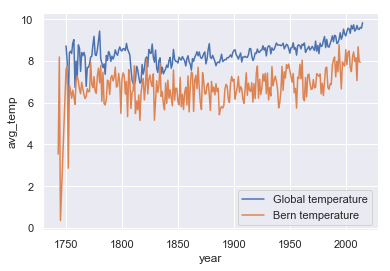

In [14]:
# Plot with avgerage temperature
sns.lineplot(x="year", y="avg_temp",
             data=global_data, label= 'Global temperature')
sns.lineplot(x="year", y="avg_temp",
             data=bern_data, label= 'Bern temperature')

In the plot it is visible that the temperature ascended continuously globally and locally during the past 60 years. Before 1950 the temperature was quite consistent with up and downs.  
The first records seem a little off, but this is due to the lack of weather data and the quality of the measurement.

> Short sidenote: Had to check the average temperature as the displayed values seemed too low for me. My concerns proofed to be true. The temperature is in the actual dataset a couple of degrees hotter. This should concern us.

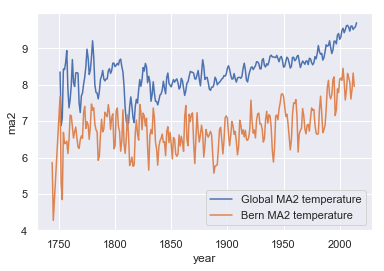

In [15]:
# Plot with a moving average of 2
sns.lineplot(x="year", y="ma2",
             data=global_data, label= 'Global MA2 temperature')
sns.lineplot(x="year", y="ma2",
             data=bern_data, label= 'Bern MA2 temperature')

Besides the temperature differences, the local data seems to oscillate stronger than the global data. This is based on the assumption that the global data suppresses outliers through the bigger amount of given data per average calculation.

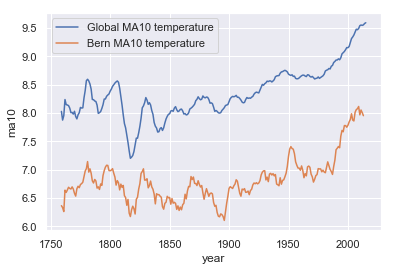

In [16]:
# Moving average of 10
bern_data['ma10'] = bern_data['avg_temp'].rolling(window=10).mean()
global_data['ma10'] = global_data['avg_temp'].rolling(window=10).mean()

# Plot with a moving average of 10
sns.lineplot(x="year", y="ma10",
             data=global_data, label= 'Global MA10 temperature')
sns.lineplot(x="year", y="ma10",
             data=bern_data, label= 'Bern MA10 temperature')

With a moving average of 10 there are some insights worth highlighting. With a moving average of 2 it was difficult to see the sudden drop of the temperature during the years of 1820. Now it is clearly visible, especially for the global data.

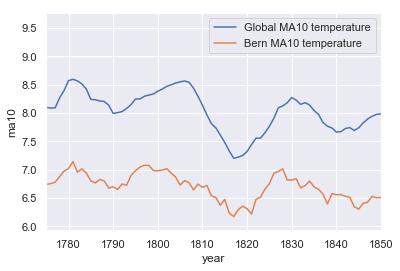

In [17]:
# Plot with a moving average of 10
sns.lineplot(x="year", y="ma10",
             data=global_data, label= 'Global MA10 temperature').set_xlim([1775, 1850])
sns.lineplot(x="year", y="ma10",
             data=bern_data, label= 'Bern MA10 temperature')

Zooming in, shows, that the local temperature starts earlier to decrease in the timeline but the global temperature decreases instead more drastically.

In [18]:
bern_data['ma100'] = bern_data['avg_temp'].rolling(window=100).mean()
global_data['ma100'] = global_data['avg_temp'].rolling(window=100).mean()

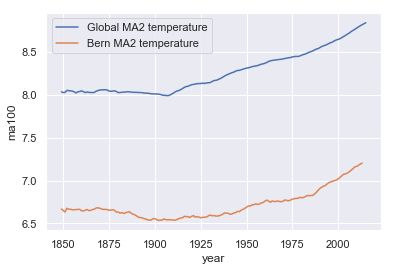

In [19]:
sns.lineplot(x="year", y="ma100",
             data=global_data, label= 'Global MA2 temperature')
sns.lineplot(x="year", y="ma100",
             data=bern_data, label= 'Bern MA2 temperature')

A moving average of 100 smooths the temperature line too strong and a lot of details get lost.  
Nonetheless, this plot illustrates significantly the average temperature difference between Bern and the Globe,  
whereas Bern almost consistently has 1.5 degrees less than the rest of the world.

# Conclusion
The local temperature is colder than the global temperature but they share  common trends, not just the ever-present trend upwards from the last 60 years but as well as the bigger up and downs in the past. 